<a href="https://colab.research.google.com/github/coderXeno/Custom-Object-Detection/blob/main/Custom_Object_Dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

from torch.utils.data import random_split
from torch.utils.data import DataLoader

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
dataset = CIFAR100(root = 'data/', download = True, transform=ToTensor())
test_ds = CIFAR100(root = 'data/', download = False, transform=ToTensor())

100%|██████████| 169001437/169001437 [00:05<00:00, 29750463.26it/s]


Extracting data/cifar-100-python.tar.gz to data/


In [ ]:
print(dataset)
print(test_ds)

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
dataset_size = len(dataset)
test_ds_size = len(test_ds)

print('images in dataset', dataset_size)
print('images in test dataset', test_ds_size)

images in dataset 50000
images in test dataset 50000


In [ ]:
print('number of classes: ', len(dataset.classes))
print(dataset.classes)

number of classes:  100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe',

In [ ]:
for img, label in dataset:
  print('img.shape: ', img.shape)
  print('label: ', label)
  print()
  print('img tensor: ')
  print(img)
  break

img.shape:  torch.Size([3, 32, 32])
label:  19

img tensor: 
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7647, 0.8314, 0.7137],
         [1.0000, 0.9961, 0.9961,  ..., 0.6667, 0.6314, 0.5725],
         [1.0000, 0.9961, 1.0000,  ..., 0.7412, 0.6510, 0.4745],
         ...,
         [0.5804, 0.5569, 0.5490,  ..., 0.1176, 0.2549, 0.2980],
         [0.4784, 0.4706, 0.4941,  ..., 0.0863, 0.3804, 0.5529],
         [0.3412, 0.3451, 0.3961,  ..., 0.1333, 0.4118, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8784, 0.7608],
         [1.0000, 0.9961, 0.9961,  ..., 0.6902, 0.6588, 0.6039],
         [1.0000, 0.9961, 1.0000,  ..., 0.7804, 0.6980, 0.5216],
         ...,
         [0.7255, 0.7137, 0.7020,  ..., 0.0667, 0.2431, 0.3020],
         [0.6157, 0.6078, 0.6275,  ..., 0.0627, 0.4392, 0.6314],
         [0.4784, 0.4784, 0.5255,  ..., 0.1412, 0.5216, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7569, 0.8000, 0.6549],
         [1.0000, 0.9961, 0.9961,  ..., 0.5882, 0.5098, 0.4431

In [ ]:
dataset_classes_dict = dict()

for item in dataset:
  label = dataset.classes[item[1]]
  if label in dataset_classes_dict:
    dataset_classes_dict[label] += 1
  else:
    dataset_classes_dict[label] = 1

#print(dataset_classes_dict)
dataset_classes_dict

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

In [ ]:
test_classes_dict = dict()

for test_item in test_ds:
    label = test_ds.classes[test_item[1]]
    if label in test_classes_dict:
      test_classes_dict[label] += 1
    else:
      test_classes_dict[label] = 1

test_classes_dict

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

In [ ]:
import cv2
import numpy as np

def show_example(img, label):
  print('Label: ', dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1, 2, 0))

Label:  cattle (19)


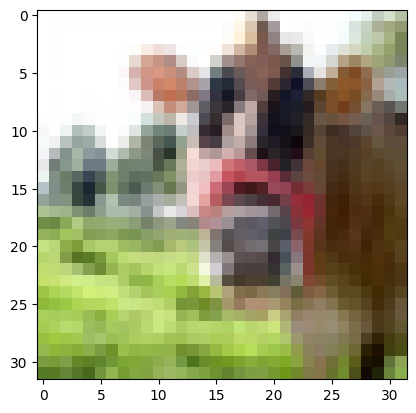

In [ ]:
img, label = dataset[0]
show_example(img, label)

Label:  tank (85)


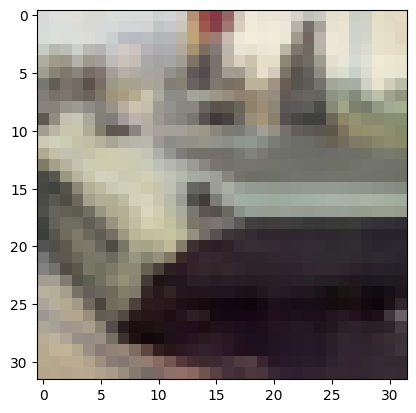

In [ ]:
show_example(*dataset[4132])

In [ ]:
random_seed = 43
torch.manual_seed(random_seed)

In [ ]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
print('total images in our training set: ', len(train_ds))
print('total images in our validation set: ', len(val_ds))

total images in our training set:  40000
total images in our validation set:  10000


In [ ]:
dataset_url = 'https://www.cs.toronto.edu/~kriz/cifar.html'

In [ ]:
batch_size = 128

In [ ]:
train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers = 2,
                      pin_memory = True)

val_dl = DataLoader(val_ds,
                    batch_size,
                    shuffle=True,
                    num_workers = 2,
                    pin_memory = True)

test_dl = DataLoader(test_ds,
                    batch_size,
                    shuffle=True,
                    num_workers = 2,
                    pin_memory = True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

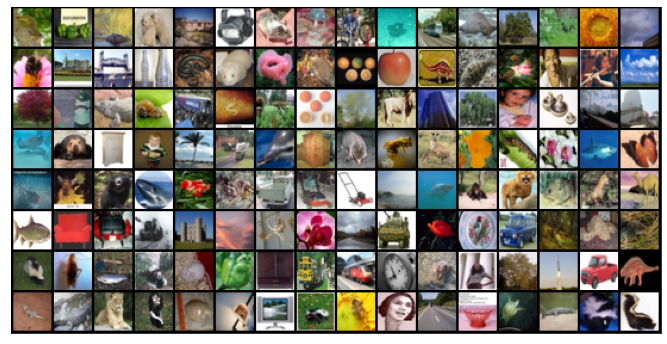

In [ ]:
show_batch(train_dl)

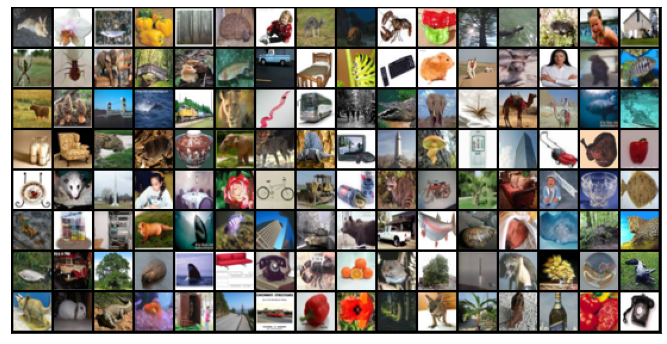

In [ ]:
show_batch(test_dl)

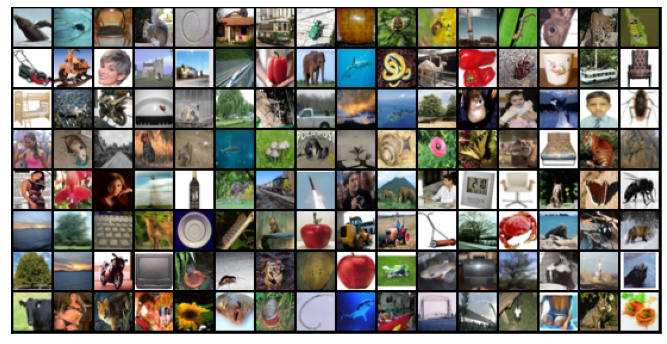

In [ ]:
show_batch(val_dl)

In [ ]:
def get_default_device():
  """Pick GPU if available, else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cuda')

def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [ ]:
train_dl

In [ ]:
def plot_losses(history):
  losses = [x['val_loss'] for x in history]
  plt.plot(losses, '-x')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('Loss vs No. of epochs')

In [ ]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No. of epochs')

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss.detach(), 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = []
    batch_accs = []

    for x in outputs:
      batch_losses.append(x['val_loss'])
      batch_accs.append(x['val_acc'])

    epoch_loss = torch.stack(batch_losses).mean()
    epoch_acc = torch.stack(batch_accs).mean()

    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], Validation Loss: {:.4f}, Validation Accuracy: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
input_size = 3 * 32 *32
output_size = len(dataset.classes)
hidden_size1 = 1034
hidden_size2 = 1034

In [ ]:
class CIFAR100Model(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    # hidden layers
    self.linear1a = nn.Linear(input_size, hidden_size1)
    self.linear1b = nn.Linear(hidden_size1, hidden_size2)
    self.linear2 = nn.Linear(hidden_size2, output_size)

  def forward(self, xb):
    #Flatten images into vectors
    xb = xb.view(xb.size(0), -1)

    #Apply hidden layers & activation functions
    out = self.linear1a(xb)
    out = F.relu(out)
    out = self.linear1b(out)
    out = F.relu(out)

    #Apply output layer
    out = self.linear2(out)
    return out

In [ ]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    #Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #Validation Phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [ ]:
model_ff = to_device(CIFAR100Model(), device)

In [ ]:
history_ff = [evaluate(model_ff, val_dl)]
history_ff

[{'val_loss': 4.607818126678467, 'val_acc': 0.01018591783940792}]

In [ ]:
history_ff += fit(20, 0.01, model_ff, train_dl, val_dl)

KeyboardInterrupt: ignored

In [ ]:
plot_losses(history_ff)

In [ ]:
history_ff += fit(10, 0.001, model_ff, train_dl, val_dl)

In [ ]:
plot_accuracies(history_ff)

In [ ]:
test_ff = evaluate(model_ff, test_dl)
test_ff

In [ ]:
arch_ff = "4 layers(1034, 1034, 10)"
lrs_ff = [0.1, 0.01, 0.001]
epochs_ff = [30, 20, 10]

test_acc_ff = 0.833024263381958
test_loss_ff = 1.0876655578613281

In [ ]:
model_ff.state_dict()

In [ ]:
torch.save(model_ff.state_dict(), 'cifar100-feedforward.pth')

In [ ]:
class Cifar100CnnModel(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        # input: 3 x 32 x 32
        nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
        # output: 32 x 32 x 32
        nn.ReLU(),
        nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
        # output: 64 x 32 x 32
        nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

        nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

        nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

        nn.Flatten(),
        nn.Linear(256 * 4 * 4, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 100)
    )

  def forward(self, xb):
    return self.network(xb)

In [ ]:
# the torch.no_grad only applies during the evaluate phase
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model_cnn = to_device(Cifar100CnnModel(), device)
model_cnn

In [ ]:
history_cnn = [evaluate(model_cnn, val_dl)]
history_cnn

In [ ]:
num_epochs_cnn = 20
opt_func = torch.optim.Adam
lr_cnn = 0.001

In [ ]:
%%time
history_cnn = fit(num_epochs_cnn, lr_cnn, model_cnn, train_dl, val_dl, opt_func)

In [ ]:
plot_accuracies(history_cnn)

In [ ]:
def plot_cnn_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  
  plt.plot(train_losses, '-bx')
  plt.plot(val_losses, '-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training, Validation'])
  plt.title('Loss vs No. of Epochs')

In [ ]:
plot_cnn_losses(history_cnn)

In [ ]:
history_cnn = [evaluate(model_cnn, test_dl)]
history_cnn

In [ ]:
def predict_image(img, model):
  # Convert to a batch of 1
  xb = to_device(img.unsqueeze(0), device)
  # Get predictions from model
  yb = model(xb)
  # Pick index with highest probability
  _, preds = torch.max(yb, dim = 1)
  # Retrieval of class label
  return dataset.classes[preds[0].item()]

In [ ]:
img, label = test_ds[3127]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_cnn))

In [ ]:
img, label = test_ds[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_cnn))

In [ ]:
test_dl = DeviceDataLoader(DataLoader(test_ds, batch_size * 2), device)
result_cnn = evaluate(model_cnn, test_dl)
result_cnn

In [ ]:
torch.save(model_cnn.state_dict(), 'cifar100-cnn.pth')
model_cnn = to_device(Cifar100CnnModel(), device)
model_cnn.load_state_dict(torch.load('cifar100-cnn.pth'))

In [ ]:
# ResNets, Regularization and Data Augmentation
import torchvision.transforms as tt
# Data transforms (normalization & data augmentation)
# stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) - cifar10
stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))      #cifar100

train_tfms = tt.Compose([tt.RandomCrop(
    32, 
    padding = 4, 
    padding_mode='reflect'
  ),
  tt.RandomHorizontalFlip(),
  # tt.RandomRotate
  # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
  # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
  tt.ToTensor(),
  tt.Normalize(*stats, inplace=True)
])

valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [ ]:
train_ds = CIFAR100(root = 'data/', download = True, transform = train_tfms)
valid_ds = CIFAR100(root = 'data/', train = False, transform = valid_tfms)

Files already downloaded and verified


In [ ]:
batch_size = 400

In [ ]:
train_dl = DataLoader(
    train_ds, 
    batch_size, 
    shuffle = True, 
    num_workers = 2,
    pin_memory = True
)

valid_dl = DataLoader(
    valid_ds,
    batch_size * 2,
    num_workers = 2,
    pin_memory = True
)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

train_dl

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
  layers = [
      nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1),
      nn.BatchNorm2d(out_channels),
      nn.ReLU(inplace = True)
  ]
  if pool: layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
  def __init__(self, in_channels, num_classes):
    super().__init__()
    # 3 x 32 x32
    self.conv1 = conv_block(in_channels, 64)         # 64 x 32 x 32
    self.conv2 = conv_block(64, 128, pool = True)    # 128 x 16 x 16
    self.res1 = nn.Sequential(conv_block(128, 128),  # 128 x 16 x 16  
                              conv_block(128, 128))
    
    self.conv3 = conv_block(128, 256, pool = True)   # 256 x 8 x 8
    self.conv4 = conv_block(256, 512, pool = True)   # 512 x 4 x 4
    self.res2 = nn.Sequential(conv_block(512, 512),
                              conv_block(512, 512))  # 512 x 4 x 4

    self.classifier = nn.Sequential(nn.MaxPool2d(4), # 512 x 1 x 1
                                    nn.Flatten(),    # 512
                                    nn.Dropout(0.2),
                                    nn.Linear(512, num_classes)) # 100

  def forward(self, xb):
    out1 = self.conv1(xb)
    out2 = self.conv2(out1)
    out3 = self.res1(out2) + out2
    out4 = self.conv3(out3)
    out5 = self.conv4(out4)
    out6 = self.res2(out5) + out5
    out = self.classifier(out6)

    return out

In [ ]:
model_resnet9 = to_device(ResNet9(3, 100), device)
model_resnet9

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
# Calling model eval before doing any evaluation
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()      
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Setting up the custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Setting up the one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history_resnet9 = [evaluate(model_resnet9, valid_dl)]
history_resnet9

[{'val_loss': 4.6059393882751465, 'val_acc': 0.009807691909372807}]

In [ ]:
epochs = 50
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history_resnet9 += fit_one_cycle(epochs, max_lr, model_resnet9,
                                 train_dl, valid_dl,
                                 grad_clip = grad_clip,
                                 weight_decay = weight_decay,
                                 opt_func=opt_func)

Epoch [0], Validation Loss: 3.3258, Validation Accuracy: 0.2067
Epoch [1], Validation Loss: 2.8987, Validation Accuracy: 0.2763
Epoch [2], Validation Loss: 2.6815, Validation Accuracy: 0.3276
Epoch [3], Validation Loss: 2.2311, Validation Accuracy: 0.4093
Epoch [4], Validation Loss: 2.2857, Validation Accuracy: 0.4074
Epoch [5], Validation Loss: 2.7530, Validation Accuracy: 0.3673
Epoch [6], Validation Loss: 2.0815, Validation Accuracy: 0.4476
Epoch [7], Validation Loss: 2.1154, Validation Accuracy: 0.4517
Epoch [8], Validation Loss: 1.6934, Validation Accuracy: 0.5344
Epoch [9], Validation Loss: 1.8425, Validation Accuracy: 0.4988
Epoch [10], Validation Loss: 2.3179, Validation Accuracy: 0.4292
Epoch [11], Validation Loss: 1.8330, Validation Accuracy: 0.5151
Epoch [12], Validation Loss: 1.7781, Validation Accuracy: 0.5314
Epoch [13], Validation Loss: 2.0159, Validation Accuracy: 0.4753
Epoch [14], Validation Loss: 1.9001, Validation Accuracy: 0.5080
Epoch [15], Validation Loss: 1.7991

In [ ]:
model_resnet9.state_dict()

OrderedDict([('conv1.0.weight', tensor([[[[ 0.0813,  0.1192,  0.1047],
                        [ 0.1047,  0.1624,  0.1385],
                        [ 0.0165,  0.0397,  0.0069]],
              
                       [[ 0.0759,  0.0951,  0.1014],
                        [ 0.0835,  0.0793,  0.0867],
                        [-0.0657, -0.1317, -0.1325]],
              
                       [[ 0.0668,  0.1161,  0.1198],
                        [ 0.1353,  0.1604,  0.1377],
                        [ 0.0121, -0.0101, -0.0637]]],
              
              
                      [[[-0.0389,  0.2599, -0.0601],
                        [ 0.2456,  0.1007, -0.4799],
                        [ 0.6046, -0.2267, -0.4632]],
              
                       [[ 0.1075,  0.2066,  0.2147],
                        [-0.4088,  0.2932,  0.2296],
                        [-0.4305, -0.2813,  0.1041]],
              
                       [[ 0.0169, -0.5216, -0.1597],
                        [-0.0643, -0.1

In [ ]:
history_resnet9 = [evaluate(model_resnet9, train_dl)]
history_resnet9

[{'val_loss': 0.1027095764875412, 'val_acc': 0.9736999273300171}]

Label: streetcar , Predicted: streetcar


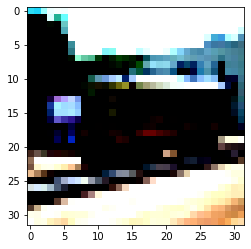

In [ ]:
img, label = valid_ds[12]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

In [ ]:
img, label = valid_ds[134]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

NameError: ignored